# Imports and utility functions

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import scipy.optimize as opt

In [12]:
def ssd(sample):
    var = np.var(sample)
    return np.sqrt(var * len(sample) / (len(sample) - 1))

def sem(sample):
    return ssd(sample) / np.sqrt(len(sample))

def paste(arr):
#     print('mean:', np.mean(arr),
#           'sd:', ssd(arr),
#           'sem:', sem(arr))
    print('mean±sem: {m:.3f} ± {e:.3f}'.format(m=np.mean(arr), e=sem(arr)))
    return np.mean(arr), sem(arr)

# Data: Forces

## Data: Cork

In [13]:
mean_forces, force_errors = [], []
masses = [50.4, 140.4, 230.4, 322.4, 412.4, 507.9]

f1 = [0.12, 0.15, 0.15, 0.12, 0.15]
f, e = paste(f1)
mean_forces += [f]
force_errors += [e]

f2 = [0.50, 0.38, 0.42, 0.35, 0.38]
f, e = paste(f2)
mean_forces += [f]
force_errors += [e]

f3 = [0.65, 0.75, 0.68, 0.68, 0.65]
f, e = paste(f3)
mean_forces += [f]
force_errors += [e]

f4 = [1.02, 1.05, 1.10, 0.98, 0.98]
f, e = paste(f4)
mean_forces += [f]
force_errors += [e]

f5 = [1.28, 1.52, 1.35, 1.32, 1.42]
f, e = paste(f5)
mean_forces += [f]
force_errors += [e]

f6 = [1.60, 1.87, 2.00, 1.82, 1.80]
f, e = paste(f6)
mean_forces += [f]
force_errors += [e]

mean±sem: 0.138 ± 0.007
mean±sem: 0.406 ± 0.026
mean±sem: 0.682 ± 0.018
mean±sem: 1.026 ± 0.023
mean±sem: 1.378 ± 0.042
mean±sem: 1.818 ± 0.065


In [18]:
normal_forces = [m / 1000 * 9.8 for m in masses]
print(normal_forces)

alpha_m = [0.1, 0.1, 0.1, 1, 1, 1]
normal_force_errors = [normal_forces[i] * np.sqrt((alpha_m[i] / masses[i])**2+(0.001)**2) for i in range(len(masses))]
print(normal_force_errors)

[0.49392, 1.37592, 2.25792, 3.1595199999999997, 4.04152, 4.97742]
[0.001097431987140889, 0.001689247124135483, 0.002461422906856926, 0.010296726015117622, 0.010600654881204276, 0.010991574493965822]


In [17]:
mean_forces

[0.138,
 0.40599999999999997,
 0.682,
 1.0260000000000002,
 1.3780000000000001,
 1.8180000000000003]

## Data: Cardboard

In [15]:
mean_forces_cb, force_errors_cb = [], []
masses = [50.4, 140.4, 230.4, 322.4, 412.4, 507.9]

f1_cb = [0.10, 0.10, 0.05, 0.05, 0.02]
f, e = paste(f1_cb)
mean_forces_cb += [f]
force_errors_cb += [e]

f2_cb = [0.32, 0.32, 0.28, 0.35, 0.30]
f, e = paste(f2_cb)
mean_forces_cb += [f]
force_errors_cb += [e]

f3_cb = [0.50, 0.55, 0.60, 0.48, 0.60]
f, e = paste(f3_cb)
mean_forces_cb += [f]
force_errors_cb += [e]

f4_cb = [0.85, 0.80, 0.82, 0.80, 0.82]
f, e = paste(f4_cb)
mean_forces_cb += [f]
force_errors_cb += [e]

f5_cb = [1.08, 1.12, 1.18, 1.00, 1.25]
f, e = paste(f5_cb)
mean_forces_cb += [f]
force_errors_cb += [e]

f6_cb = [1.28, 1.42, 1.42, 1.52, 1.38]
f, e = paste(f6_cb)
mean_forces_cb += [f]
force_errors_cb += [e]

mean±sem: 0.064 ± 0.016
mean±sem: 0.314 ± 0.012
mean±sem: 0.546 ± 0.025
mean±sem: 0.818 ± 0.009
mean±sem: 1.126 ± 0.043
mean±sem: 1.404 ± 0.039


## Analysis

In [46]:

#proportional model y=mx
def model_prop(x,m):
    return m*x

#linear model y=mx+c
def model_lin(x,m,c):
    return m*x + c

# Calculating the chisq (*not reduced*)
def chisq(predicted, observed, errors):
    res = observed-predicted
    print(res, errors)
    norm_res = res / errors 
    return np.sum(norm_res**2)

def red_chisq(raw_chisq, v):
    return raw_chisq / v

In [47]:
x_dat = np.array(normal_forces)
y_dat = np.array(mean_forces)
y_err = np.array(force_errors)

In [48]:
# The order of the parameter array elements p0, lin_opt, and lin_cov
# are determined by their order [m,b] in the model definition, model_lin(x,m,b):
# we are using an unweighted fit

# Set initial parameters mInit and bInit
mInit=0.025
cInit=-0.05

#fit the unweighted model y=mx+b
lin_opt, lin_cov = opt.curve_fit(model_lin, x_dat, y_dat, p0=[mInit,cInit])

In [39]:
# Predicted values
y_lin = model_lin(x_dat, lin_opt[0], lin_opt[1])

#error in the fit variables
lin_err = np.sqrt(np.diag(lin_cov))  

print('m = {0:6.4f} ± {1:5.4f}'.format(lin_opt[0], lin_err[0]))
print(f"c = {lin_opt[1]:.4f} ±  {lin_err[1]:.4f}")


m = 0.3726 ± 0.0157
c = -0.1046 ±  0.0489


In [41]:
#chi squared for linear case
chi2_lin = chisq(y_lin, y_dat, y_err)

print('χ2 =', chi2_lin) #unformatted, as an example

red_chi2_lin = red_chisq(chi2_lin, 4)
print('χ~2 =', red_chi2_lin)

[ 0.05857666 -0.00205456 -0.05468577 -0.04661989 -0.02325111  0.06803467] [0.00734847 0.026      0.01827567 0.02271563 0.04223742 0.06468385]
χ2 = 78.12250027443748
χ~2 = 19.53062506860937


In [49]:
# Fit the initial y=ax model to the data and display results
prop_opt, prop_cov = opt.curve_fit(model_prop, x_dat, y_dat, p0=[0.025])

# Extracting the standard errors in the fit parameters, from the covariance matrix diagonal
prop_err = np.sqrt(np.diag(prop_cov))

# Displaying   ("\u00B1" is the plus/minus symbol)
# We're using string formatting with the "%" to limit the # of digits... just look it up

print("a = %5.3f \u00b1 %5.3f m/N" % (prop_opt[0], prop_err[0]))

a = 0.343 ± 0.010 m/N


[-0.03158847 -0.06642501 -0.09326156 -0.0588278  -0.00966435  0.10899243] [0.00734847 0.026      0.01827567 0.02271563 0.04223742 0.06468385]


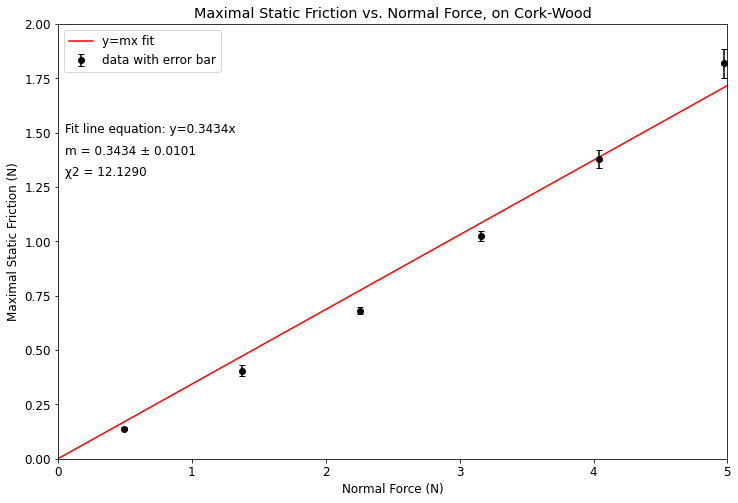

In [68]:
# Plot data with best-fit for the model y=ax
plt.figure(figsize=(12, 8))
plt.plot(np.linspace(0,5),model_prop(np.linspace(0,5), prop_opt[0]),'r-', label="y=mx fit")
plt.errorbar(x_dat, y_dat, yerr=y_err, fmt='ko', capsize = 3, capthick = 1, label="data with error bar")
plt.title('Data with linear model, initial parameters')
plt.xlabel('Normal Force (N)')
plt.ylabel('Maximal Static Friction (N)')
plt.title("Maximal Static Friction vs. Normal Force, on Cork-Wood")
plt.xlim(0,5)
plt.ylim(0,2)
plt.legend()
plt.text(.05,1.5, "Fit line equation: y=%5.4fx" %(prop_opt[0]))
plt.text(.05,1.4, "m = %5.4f \u00b1 %5.4f" % (prop_opt[0], prop_err[0]))
y_prop = model_prop(x_dat, prop_opt[0])
chi2_prop = chisq(y_prop, y_dat, y_err)
plt.text(.05,1.3, "χ2 = %5.4f" % (red_chisq(chi2_prop, 5)))

# plt.show()
plt.savefig('fig1.png')

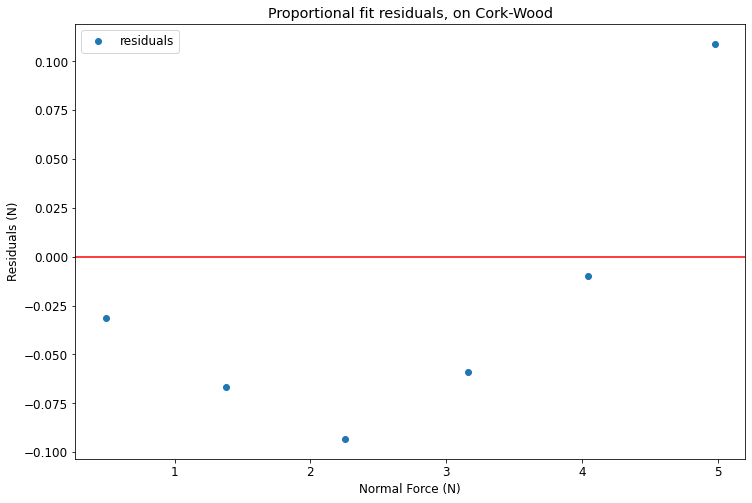

In [69]:
# Predicted y values from the fit to model y=ax
y_prop = model_prop(x_dat, prop_opt[0])

# Proportional model residuals defined
r_prop = y_dat - y_prop

# Sets figure size etc. by starting with plt.figure
fig2=plt.figure(figsize=(12, 8), facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': '12'})

# Residuals without error bars
plt.errorbar(x_dat, r_prop, yerr=None, fmt='o', label='residuals')
plt.axhline(color='r') # 0 line for reference

# Axes label and title
plt.title("Proportional fit residuals, on Cork-Wood")
plt.xlabel("Normal Force (N)")
plt.ylabel("Residuals (N)")
plt.legend()
# plt.show()
plt.savefig('fig2.png')

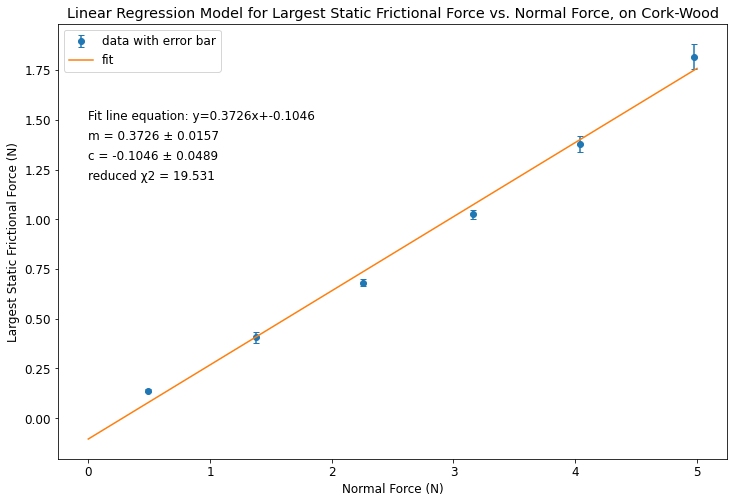

In [70]:
# Best-fit plot with error bars, parameters, chisq

# Sets figure size etc.
fig1 = plt.figure(figsize=(12, 8), facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': '12'})

# Data with error bars
plt.errorbar(x_dat, y_dat, y_err, fmt='o', capsize=3,
             capthick=1, label="data with error bar")

# Best linear fit
# could also use: plt.plot(np.linspace(0,10), model_lin(np.linspace(0,10), lin_opt[0], lin_opt[1]), label='fit')
plt.errorbar(np.linspace(0, 5), model_lin(
    np.linspace(0, 5), lin_opt[0], lin_opt[1]), label='fit')

# Axes label and title
plt.title("Linear Regression Model for Largest Static Frictional Force vs. Normal Force, on Cork-Wood")
plt.xlabel("Normal Force (N)")
plt.ylabel("Largest Static Frictional Force (N)")
# 
# Best fit parameters, uncertainties, and chisq
plt.text(0, 1.4, "m = %5.4f \u00b1 %5.4f" % (lin_opt[0], lin_err[0]))
plt.text(0, 1.3, "c = %5.4f \u00b1 %5.4f" % (lin_opt[1], lin_err[1]))
plt.text(0, 1.2, "reduced χ2 = %5.3f" % red_chi2_lin)

plt.text(0, 1.5, "Fit line equation: y=%5.4fx+%5.4f" %
         (lin_opt[0], lin_opt[1]))

# plt.text(.5, .01, "ΔL = %1.2f \u00b1 %5.4f m" % (y_dat[0], y_err[0]))
# plt.text(.8, .03, "ΔL = %1.2f \u00b1 %5.4f m" % (y_dat[1], y_err[1]))
# plt.text(1.25, .06, "ΔL = %1.2f \u00b1 %5.4f m" % (y_dat[2], y_err[2]))
# plt.text(1.6, .09, "ΔL = %1.2f \u00b1 %5.4f m" % (y_dat[3], y_err[3]))
# plt.text(1.9, .12, "ΔL = %1.2f \u00b1 %5.4f m" % (y_dat[4], y_err[4]))
# plt.text(1.8, .17, "ΔL = %1.2f \u00b1 %5.4f m" % (y_dat[5], y_err[5]))

plt.legend()
plt.savefig('fig3.png')

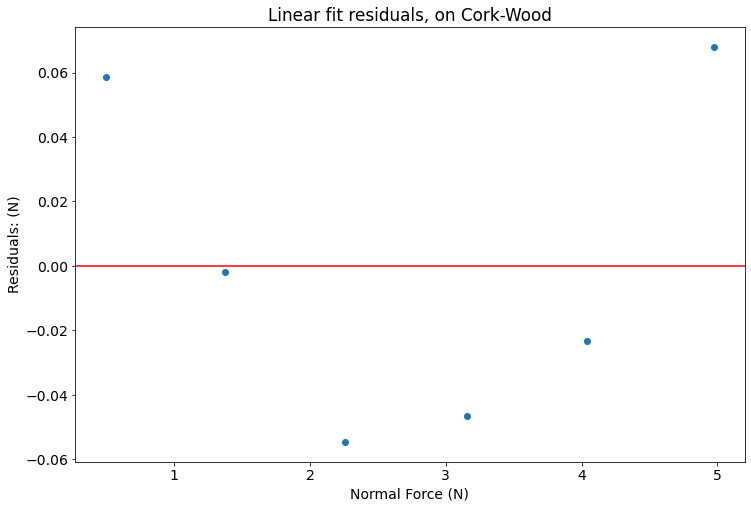

In [71]:
# Residuals plot

# Residuals
r_lin = y_dat- y_lin

# Sets figure size etc.
fig2=plt.figure(figsize=(12, 8), facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': '14'})

# Residuals
plt.errorbar(x_dat, r_lin, fmt='o')
plt.axhline(color='r') # 0 line for reference

# Axes label and title
plt.title("Linear fit residuals, on Cork-Wood")
plt.xlabel("Normal Force (N)")
plt.ylabel("Residuals: (N)")
# plt.show()
plt.savefig('fig4.png')

In [5]:
'±'

'±'